<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_9/i)_Audio_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install librosa
!pip3 install numba>=0.53

In [ ]:
import librosa
import numpy as np
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

audio_data = "/content/578358main_kepler_star_KIC12268220C.mp3"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(155056,) 22050


In [ ]:
librosa.load(audio_data, sr=44100)

(array([ 4.0354620e-10,  5.7765237e-10,  2.9233271e-10, ...,
        -2.0171693e-02, -2.2792086e-02,  0.0000000e+00], dtype=float32),
 44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_data)

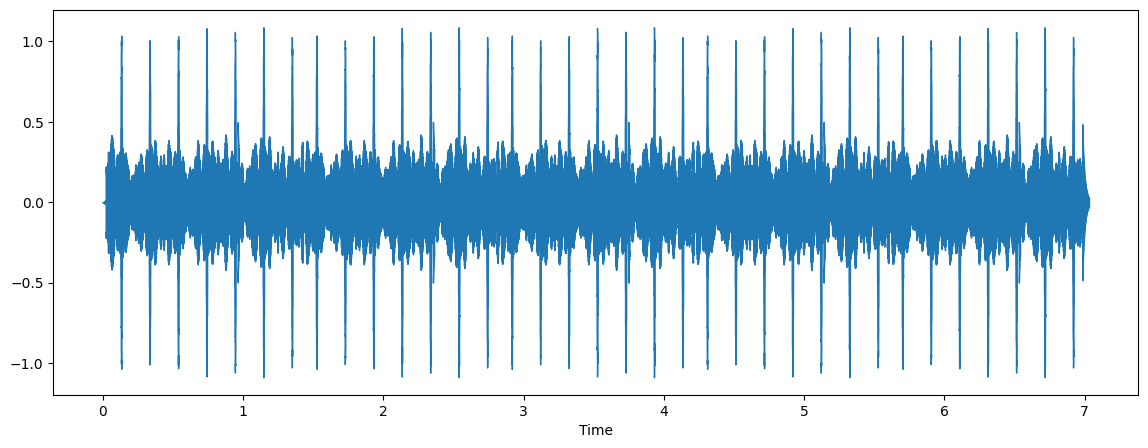

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [ ]:
# Build a simple chroma filter bank
chromafb = librosa.filters.chroma(sr=22050, n_fft=4096)

chromafb

array([[1.70601543e-05, 2.82992725e-04, 1.03555294e-03, ...,
        5.23030704e-21, 4.43047226e-21, 3.75236833e-21],
       [1.66987356e-05, 3.18591396e-04, 1.46405352e-03, ...,
        1.25662976e-13, 1.10109757e-13, 9.64649842e-14],
       [1.61444223e-05, 3.48842266e-04, 1.90847355e-03, ...,
        5.52980168e-08, 5.01214537e-08, 4.54209257e-08],
       ...,
       [1.68931711e-05, 3.02419503e-04, 1.25730084e-03, ...,
        4.03871397e-17, 4.63902409e-17, 5.32694454e-17],
       [1.71591892e-05, 2.65152019e-04, 8.56101280e-04, ...,
        2.25072222e-25, 2.67424414e-25, 3.17644285e-25],
       [1.72155414e-05, 2.44485302e-04, 6.75355259e-04, ...,
        3.98721026e-30, 3.26509862e-30, 2.67339596e-30]], dtype=float32)

In [ ]:
# Use quarter-tones instead of semitones
librosa.filters.chroma(sr=22050, n_fft=4096, n_chroma=24)

array([[1.2062923e-05, 2.0009540e-04, 7.3222251e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1952894e-05, 2.1304651e-04, 8.7951310e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1807369e-05, 2.2526611e-04, 1.0352081e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.2171624e-05, 1.7373025e-04, 4.8452709e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2172794e-05, 1.7286799e-04, 4.7753262e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2136448e-05, 1.8663100e-04, 5.9735152e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
# Equally weight all octaves
librosa.filters.chroma(sr=22050, n_fft=4096, octwidth=None)

array([[3.06632757e-01, 2.43654341e-01, 1.60742402e-01, ...,
        2.75466492e-20, 2.33491276e-20, 1.97881458e-20],
       [3.00136745e-01, 2.74304509e-01, 2.27255851e-01, ...,
        6.61833761e-13, 5.80291837e-13, 5.08708906e-13],
       [2.90173739e-01, 3.00350249e-01, 2.96240419e-01, ...,
        2.91240070e-07, 2.64146166e-07, 2.39527623e-07],
       ...,
       [3.03631455e-01, 2.60380656e-01, 1.95162937e-01, ...,
        2.12708409e-16, 2.44482217e-16, 2.80916862e-16],
       [3.08412760e-01, 2.28293657e-01, 1.32887244e-01, ...,
        1.18539604e-24, 1.40935927e-24, 1.67509979e-24],
       [3.09425622e-01, 2.10499778e-01, 1.04831174e-01, ...,
        2.09995848e-29, 1.72074678e-29, 1.40981758e-29]], dtype=float32)

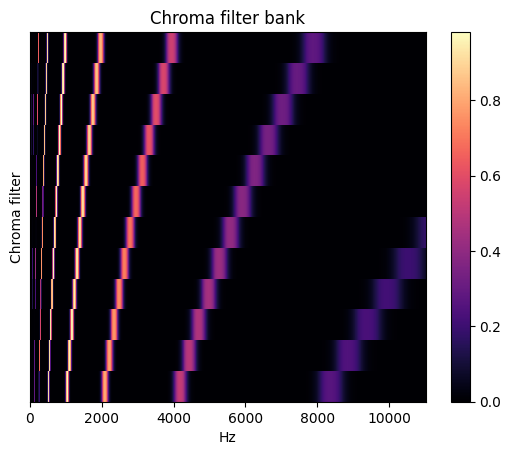

In [ ]:
#https://librosa.org/doc-playground/main/generated/librosa.filters.chroma.html?highlight=chroma#librosa.filters.chroma
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(chromafb, x_axis='linear', ax=ax)
ax.set(ylabel='Chroma filter', title='Chroma filter bank')
fig.colorbar(img, ax=ax)


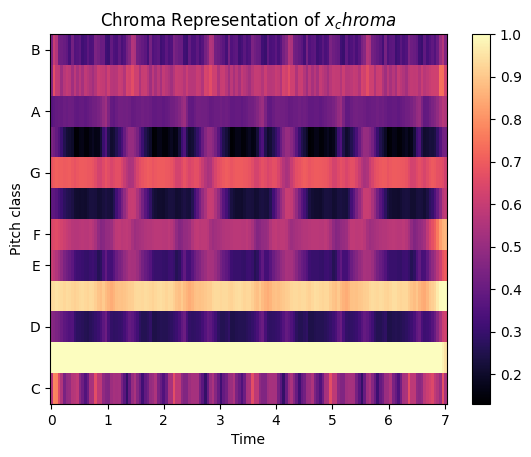

In [ ]:
#https://librosa.org/doc-playground/main/auto_examples/plot_music_sync.html?highlight=chroma

# Extract Chroma Features

hop_length = 1024

x_chroma = librosa.feature.chroma_cqt(y=x, sr=sr,
                                         hop_length=hop_length)

fig, ax = plt.subplots(nrows=1, sharey=True)
img = librosa.display.specshow(x_chroma, x_axis='time',
                               y_axis='chroma',
                               hop_length=hop_length, ax=ax)
ax.set(title='Chroma Representation of $x_chroma$')
fig.colorbar(img, ax=ax)

In [ ]:
#https://librosa.org/doc-playground/main/generated/librosa.feature.chroma_stft.html?highlight=ibrosa%20feature%20chroma_stft#librosa.feature.chroma_stft
#Energy
librosa.feature.chroma_stft(y=x, sr=sr)

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.8811363 ],
       [0.5989229 , 0.28312474, 0.19532259, ..., 0.38664067, 0.7775551 ,
        0.92881393],
       [0.25886604, 0.06828175, 0.02138191, ..., 0.20678638, 0.64988524,
        0.9740127 ],
       ...,
       [0.19836926, 0.05788017, 0.0286102 , ..., 0.20303538, 0.5664512 ,
        0.90492517],
       [0.20076908, 0.15065752, 0.24496542, ..., 0.45466027, 0.5978929 ,
        0.85558015],
       [0.54818815, 0.5775217 , 0.56433856, ..., 0.73440933, 0.8298224 ,
        0.82038623]], dtype=float32)

In [ ]:
# Use an energy (magnitude) spectrum instead of power spectrogram
S = np.abs(librosa.stft(x))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.98862195],
       [0.8172466 , 0.54019547, 0.34547338, ..., 0.63359493, 0.83011883,
        0.9819746 ],
       [0.59584254, 0.327807  , 0.14566846, ..., 0.49505484, 0.7342525 ,
        0.9971602 ],
       ...,
       [0.49989745, 0.2931981 , 0.15531279, ..., 0.51196253, 0.70179164,
        0.9884708 ],
       [0.49779668, 0.4408761 , 0.49003622, ..., 0.7303417 , 0.74033517,
        0.97636074],
       [0.7388563 , 0.7656535 , 0.7693912 , ..., 0.917293  , 0.94283056,
        0.96410066]], dtype=float32)

In [ ]:
# Use a pre-computed power spectrogram with a larger frame
S = np.abs(librosa.stft(x, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[1.        , 1.        , 1.        , ..., 0.9507986 , 1.        ,
        1.        ],
       [0.24896918, 0.17113692, 0.19810332, ..., 0.60704476, 0.45035174,
        0.6494077 ],
       [0.05093703, 0.01665137, 0.06262263, ..., 0.5799273 , 0.3591636 ,
        0.48892623],
       ...,
       [0.04222316, 0.01822728, 0.06094937, ..., 0.5615083 , 0.40301394,
        0.44872645],
       [0.1633569 , 0.15133044, 0.14605461, ..., 0.90268767, 0.717588  ,
        0.5441065 ],
       [0.52683604, 0.44090092, 0.35085446, ..., 1.        , 0.9062449 ,
        0.79074   ]], dtype=float32)

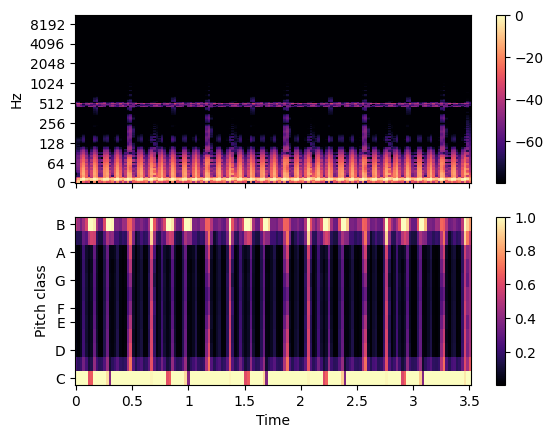

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

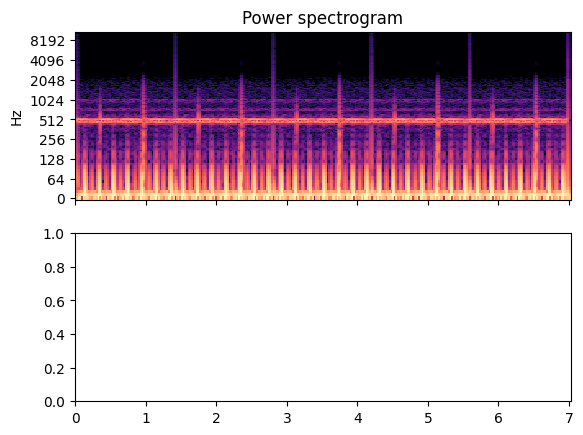

In [ ]:
# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

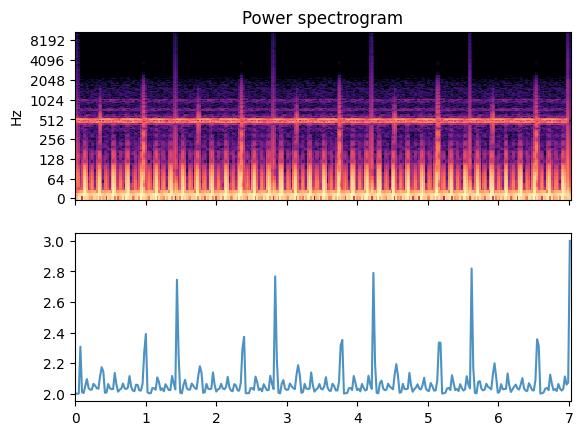

In [ ]:
# Construct a standard onset function
# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
onset_env = librosa.onset.onset_strength(y=x, sr=sr)
ax[1].plot(times, 2 + onset_env / onset_env.max(), alpha=0.8,
           label='Mean (mel)')

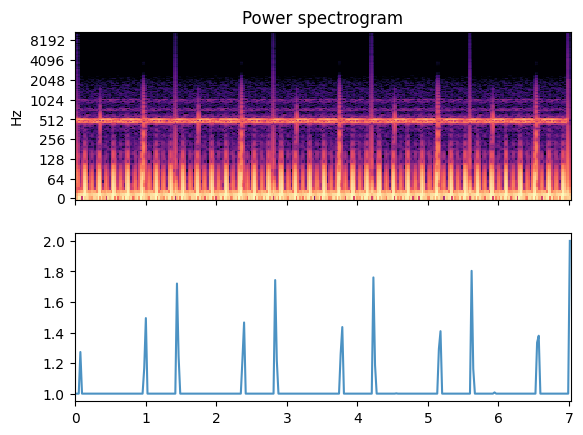

In [ ]:
# Median aggregation, and custom mel options
# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

onset_env = librosa.onset.onset_strength(y=x, sr=sr,
                                         aggregate=np.median,
                                         fmax=8000, n_mels=256)
ax[1].plot(times, 1 + onset_env / onset_env.max(), alpha=0.8,
           label='Median (custom mel)')


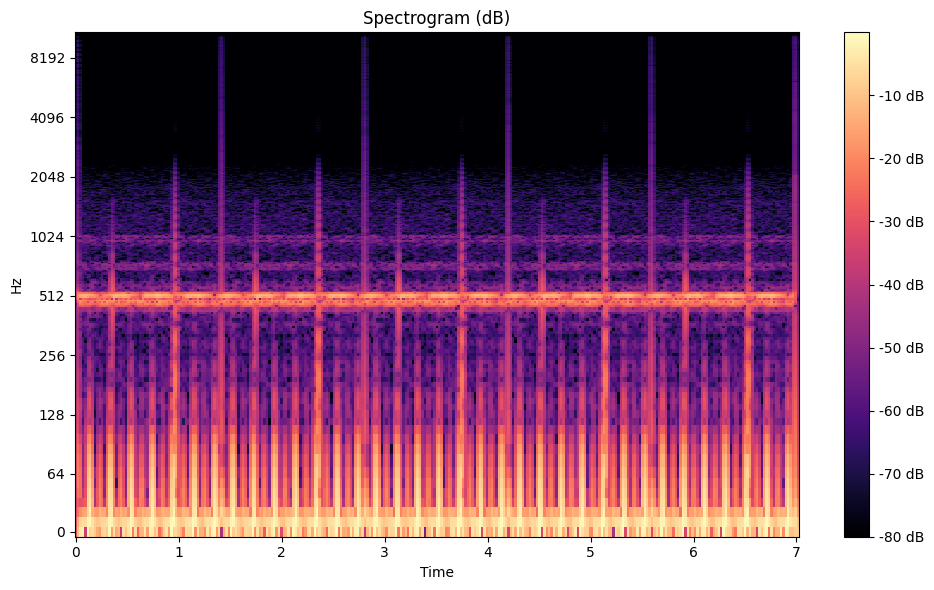

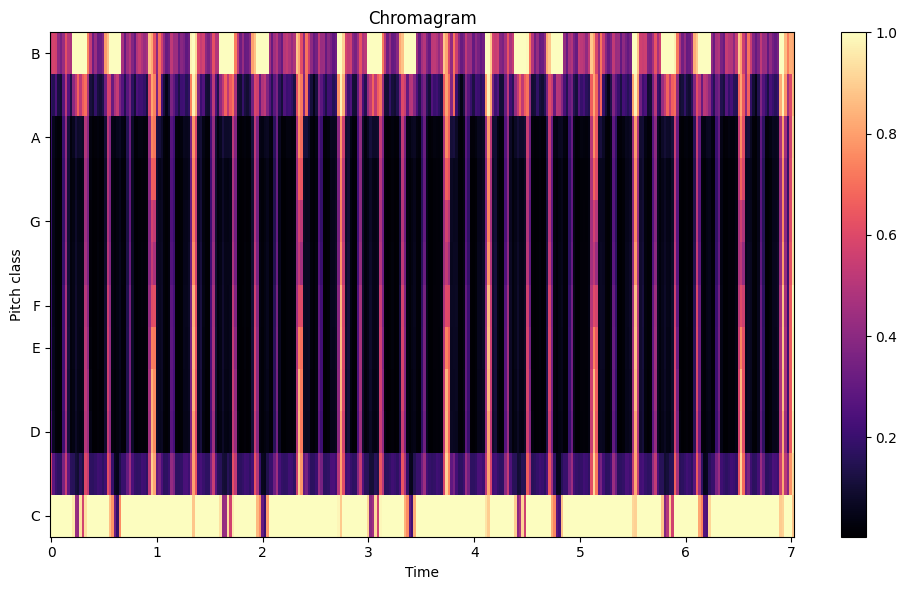

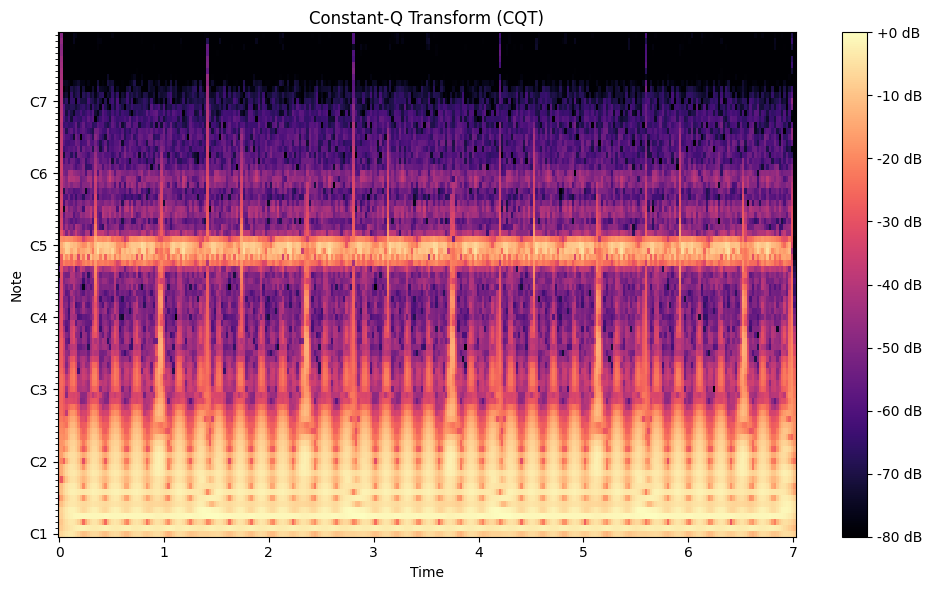

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an example audio file
audio_path = "/content/578358main_kepler_star_KIC12268220C.mp3"
y, sr = librosa.load(audio_path)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convert the amplitude to dB-scaled spectrogram
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

# Plotting the Spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (dB)')
plt.tight_layout()
plt.show()

# Chromagram
C = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(10, 6))
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

# Constant-Q Transform (CQT)
CQT = librosa.cqt(y, sr=sr)

plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(abs(CQT), ref=np.max),
                         sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q Transform (CQT)')
plt.tight_layout()
plt.show()


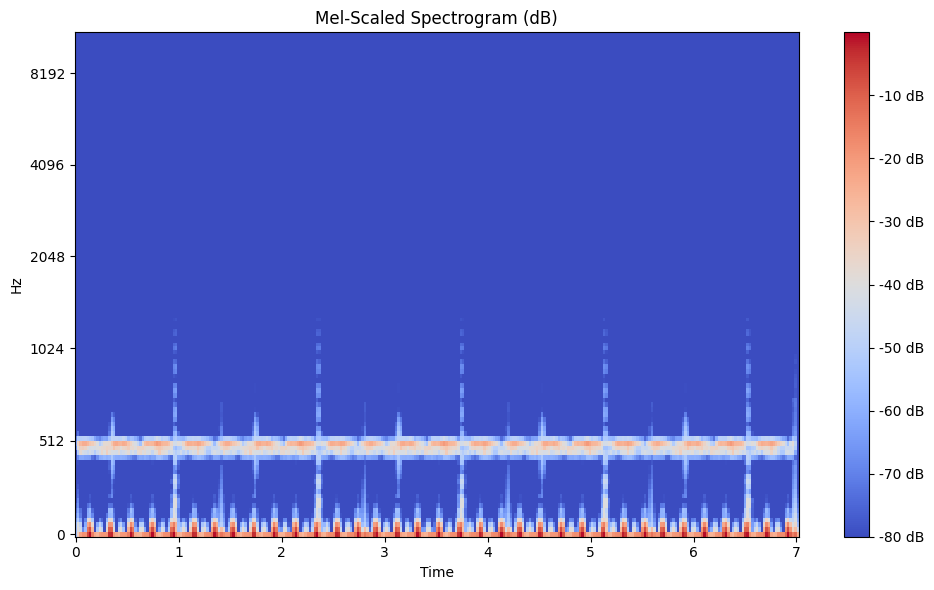

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an example audio file
audio_path = "/content/578358main_kepler_star_KIC12268220C.mp3"
y, sr = librosa.load(audio_path)

# Compute the mel-scaled spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert the mel spectrogram to dB
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Plot the mel-scaled spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Scaled Spectrogram (dB)')
plt.tight_layout()
plt.show()


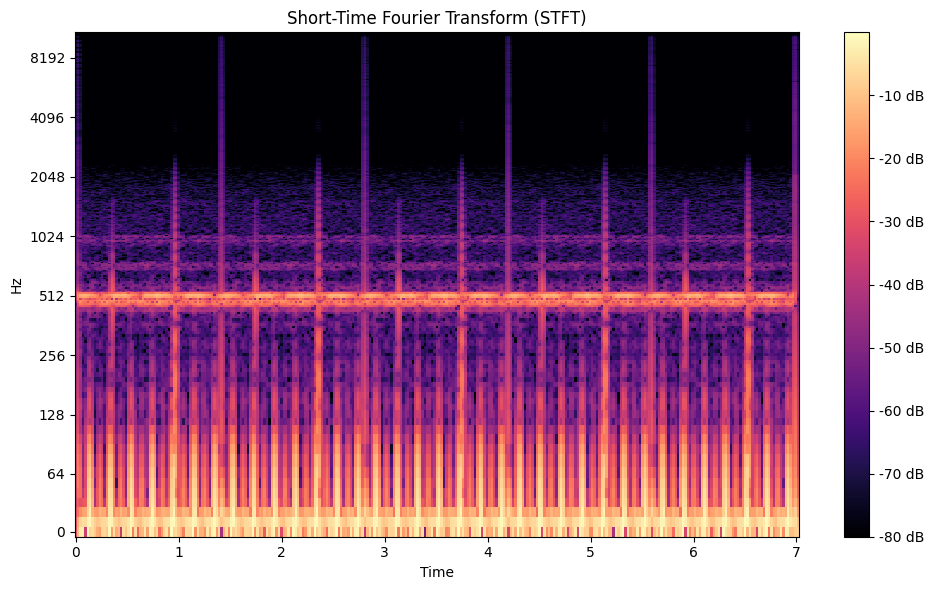

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an example audio file
audio_path = "/content/578358main_kepler_star_KIC12268220C.mp3"
y, sr = librosa.load(audio_path)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convert the complex-valued STFT result to dB-scaled magnitude spectrogram
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the STFT (dB scaled)
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Short-Time Fourier Transform (STFT)')
plt.tight_layout()
plt.show()


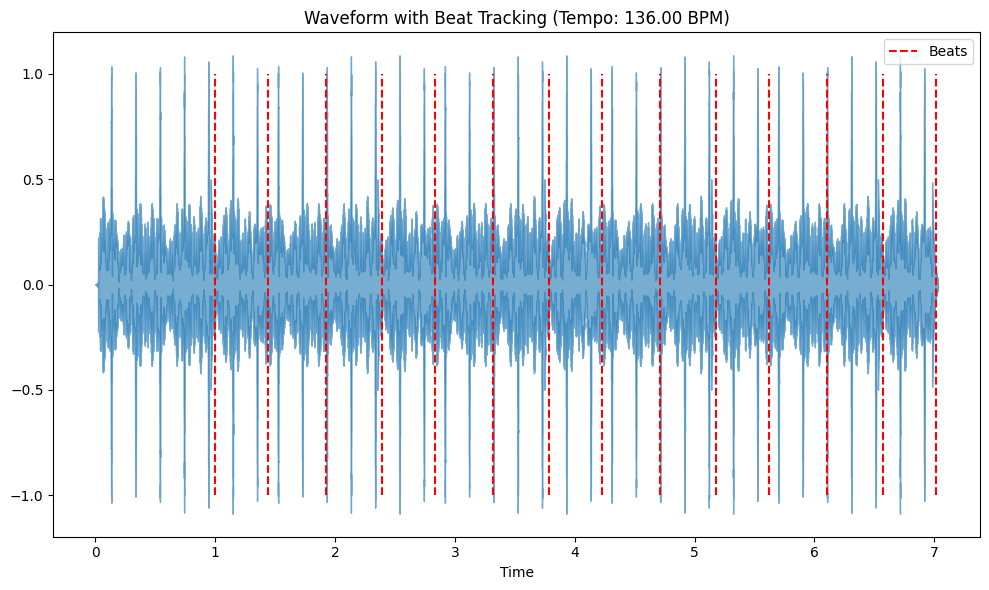

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an example audio file
audio_path = "/content/578358main_kepler_star_KIC12268220C.mp3"
y, sr = librosa.load(audio_path)

# Compute the tempo (in beats per minute) and the beat frame indices
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# Convert the beat frame indices to time
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# Display the waveform and the beat markers
plt.figure(figsize=(10, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.vlines(beat_times, -1, 1, color='r', linestyle='--', label='Beats')
# Access the first element of the tempo array
plt.title(f'Waveform with Beat Tracking (Tempo: {tempo[0]:.2f} BPM)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

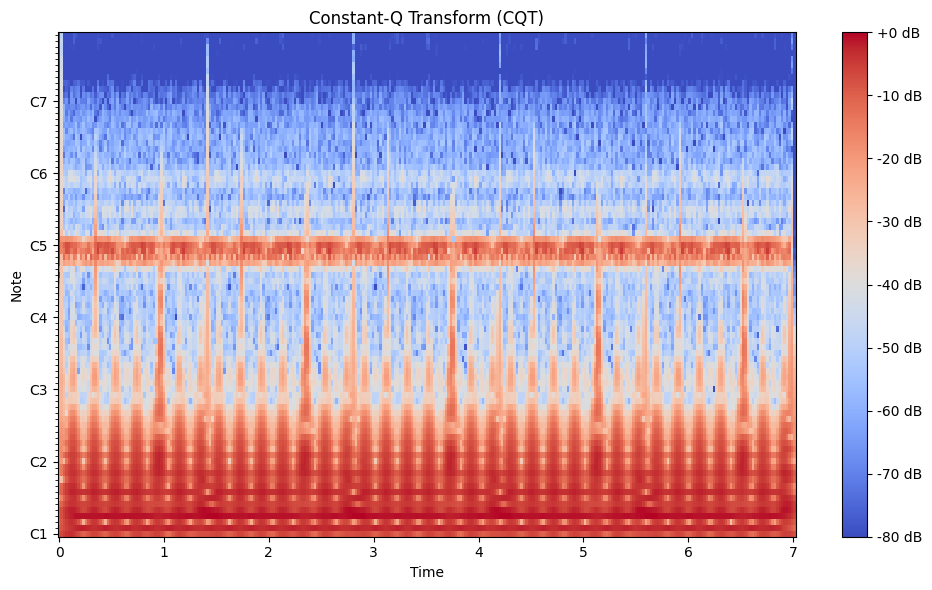

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an example audio file
audio_path = "/content/578358main_kepler_star_KIC12268220C.mp3"
y, sr = librosa.load(audio_path)

# Compute the Constant-Q Transform (CQT)
CQT = librosa.cqt(y, sr=sr)

# Convert the CQT magnitude to decibels (for better visualization)
CQT_db = librosa.amplitude_to_db(np.abs(CQT), ref=np.max)

# Plot the Constant-Q Transform (CQT)
plt.figure(figsize=(10, 6))
librosa.display.specshow(CQT_db, sr=sr, x_axis='time', y_axis='cqt_note', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q Transform (CQT)')
plt.tight_layout()
plt.show()


## Johns Hopkins APL - Parker Solar Probe - Whistler Mode Waves 2

(20, 303)


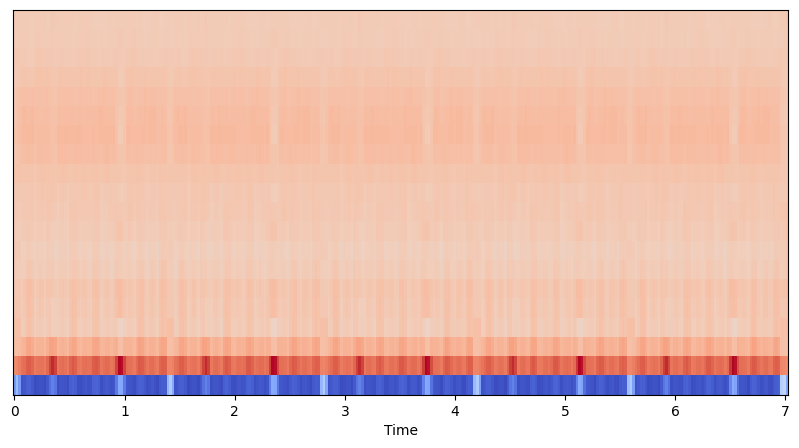

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

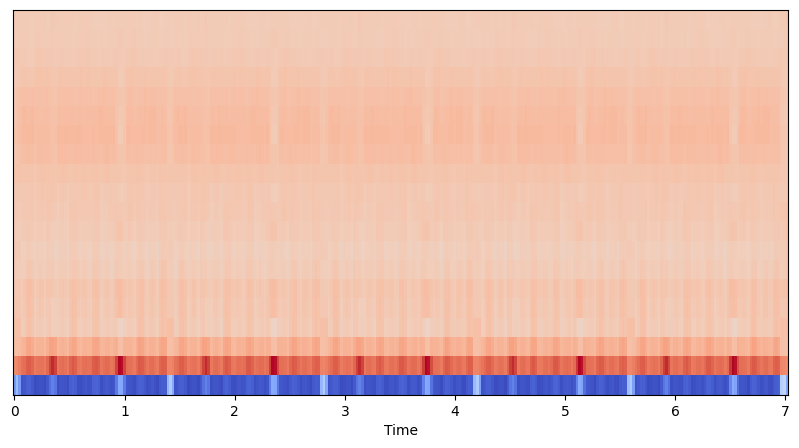

In [ ]:
#Displaying  the MFCCs:
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')